In [3]:
suppressPackageStartupMessages(library(extraDistr))
suppressPackageStartupMessages(library(distr))
source("./simple.R")
source("./simple_utils.R")
set.seed(2024)

### Q1

In [7]:
success_indicators = c(1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1)

In [8]:
# (1)
logistic_regression = function() {
  n = length(success_indicators)
  intercept = simulate(Norm(0, 1))
  slope = simulate(Norm(0, 1))
  thetas = plogis(intercept + slope * (1:n))
  for (i in (1:n)) {
    observe(success_indicators[i], Bern(thetas[i]))
  }
  next_theta = intercept + slope * (n + 1)
  pred = ifelse(next_theta >= 1 / 2, 1, 0)
  return (c(intercept, slope, pred))
}

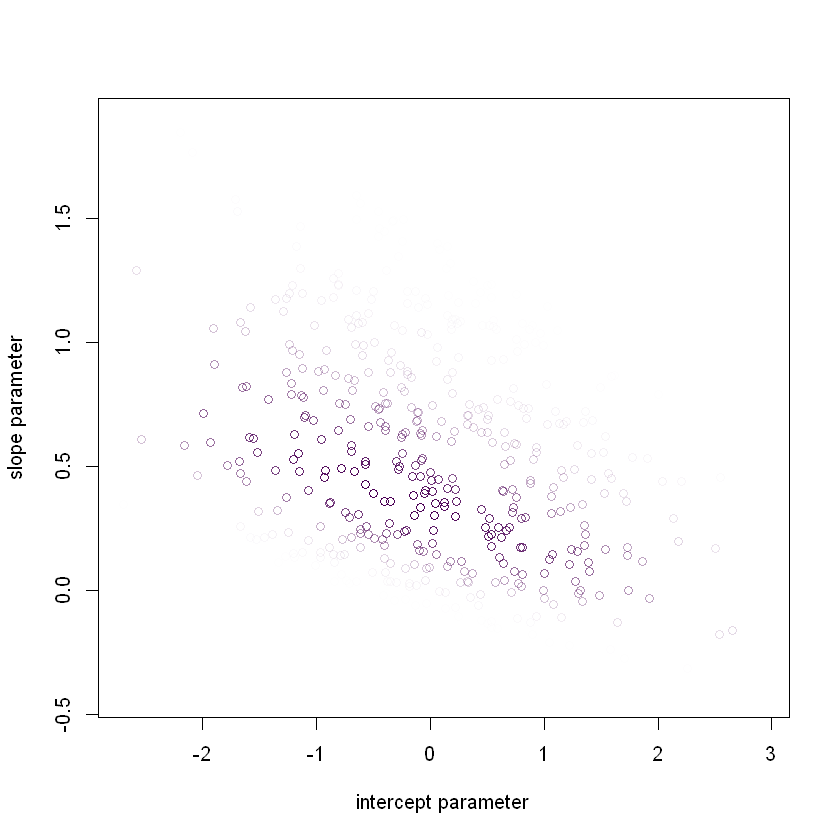

In [6]:
# (2)
posterior = posterior_particles(logistic_regression, 1000)
weighted_scatter_plot(posterior, plot_options = list(xlab="intercept parameter", ylab="slope parameter"))


In [38]:
# (3)
post_obj = posterior(logistic_regression, 1000)
intercept = post_obj[1]
slope = post_obj[2]

In [39]:
plogis(slope * (length(success_indicators) + 1) + intercept)

[1] 0.9909316

In [9]:
# (4)
logistic_regression_2 = function() {
  n = length(success_indicators)
  intercept = simulate(Norm(0, 1))
  theta = plogis(intercept)
  for (i in (1:n)) {
    observe(success_indicators[i], Bern(theta))
  }
  pred = ifelse(theta >= 1 / 2, 1, 0)
  return (c(intercept, pred))
}

In [42]:
plogis((posterior(logistic_regression_2, 1000))[1])

[1] 0.7339474

### Q2

In [10]:
unified_model = function() {
    post_logis = logistic_regression()
    post_simple = logistic_regression_2()
    p_logis = plogis(post_logis[1] + post_logis[2] * length(success_indicators))
    p_simple = plogis(post_simple[1])
    return (ifelse(p_logis > p_simple, 1, 0))
}
posterior(unified_model, 1000)

[1] 0.9558742